In [1]:
# Import the packages we will use
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas
import math

In [2]:
import sys
import os
sys.path.insert(0, os.getcwd().rsplit('/',1)[0])

import loops_utils

In [3]:
# The following directive activates inline plotting
%matplotlib inline

In [4]:
# 1 or 6 to assign chr
chr_num = 1
chr = 'chr' + str(chr_num)

In [5]:
loops_info = pandas.read_excel('dicty_loop_positions_Chr1_Chr6.xlsx')
loops_positions = loops_info[loops_info.Chr == chr_num]

loops_x = loops_positions['Genomic bin, Left base'].values
loops_y = loops_positions['Genomic bin, Right base'].values
loops_type = loops_positions['"Extrusion track"'].values
loops_size = loops_positions['Size (Kb)'].values

## Loops reshaping into one size

### Normalized Hi-C

In [6]:
arr = np.load('arrs/2kb_chr'+str(chr_num)+'_norm.npy')

In [7]:
def plot_resized_average_with_window(arr, loop_new_size, is_window = False):
    width , height = loop_new_size, loop_new_size
    resized_image_sum = np.zeros(shape=(width,height))

    for idx, x in enumerate(loops_x): 
        window = 0
        if is_window:
            window = loops_y[idx] - loops_x[idx]
            
        if loops_x[idx]-window > 0 and loops_y[idx]+window < arr.shape[1]:
            original_image = arr[loops_x[idx]-window:loops_y[idx]+window, loops_x[idx]-window:loops_y[idx]+window]
            resized_image = loops_utils.resize_image_arr(original_image, width, height)
            resized_image_sum = resized_image_sum + resized_image

    loops_utils.plot_HiC(loops_utils.z_norm_zero_middle(resized_image_sum/loops_x.shape[0]), figsize=(10, 10))   

In [8]:
loop_new_size = 100

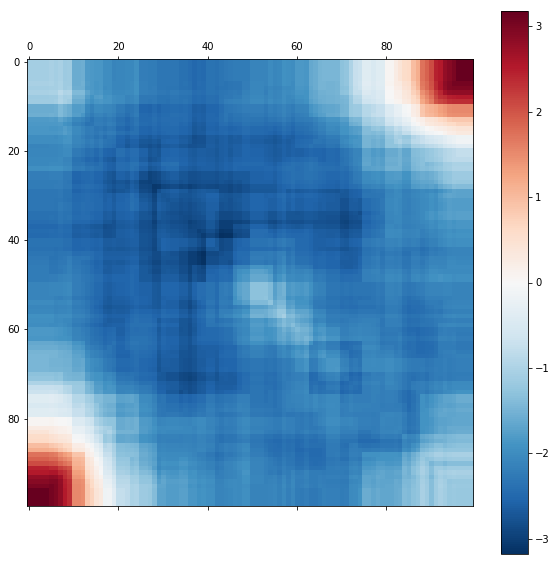

In [9]:
plot_resized_average_with_window(arr, loop_new_size)

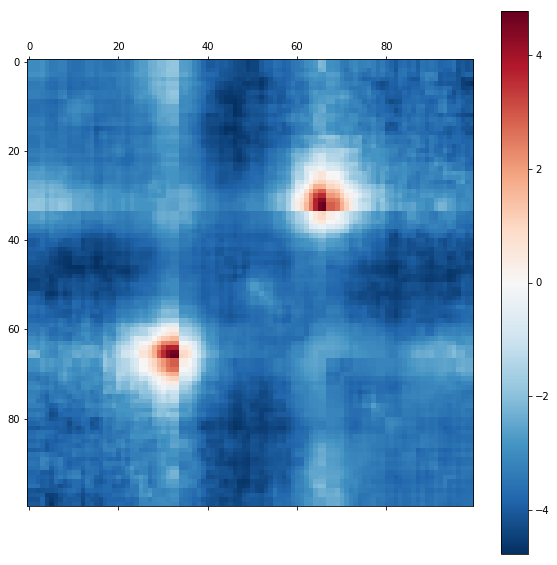

In [10]:
plot_resized_average_with_window(arr, loop_new_size, True)

## Scaling
### Calculate mean contact above the distance between bins

###### raw data

In [11]:
arr = np.load('arrs/2kb_chr'+str(chr_num)+'.npy')

### loops

###### mean

/Users/alex/Desktop/ws/hse/diploma/loops/loops_utils.py:114: RuntimeWarning: Mean of empty slice
  density[i] = np.nanmean(np.diagonal(arr, i))
/Users/alex/Desktop/ws/hse/diploma/loops/loops_utils.py:137: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(range(density.shape[0])), np.log(density), 'b');


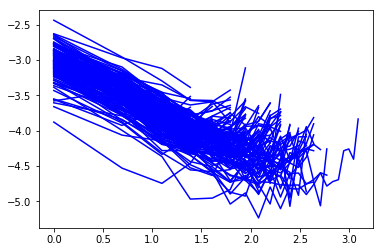

In [12]:
densities = []

for idx, x in enumerate(loops_x):
    loop = arr[x:loops_y[idx], x:loops_y[idx]]
    density = loops_utils.calc_densities_mean(loop)
    densities.append(density)
    
loops_utils.plot_densities(densities)

## Loops plus area after

In [13]:
def calc_densities_loop_plus_add_mean(x,y):
    loop = arr[x:y, x:y]
    density = loops_utils.calc_densities_mean(loop)

    add = np.max(loops_y - loops_x) - (y - x) + 10

    if x-add > 0 and y + add < arr.shape[0]:
        after_loop = np.transpose(arr[y:y+add, x-add:x])
        after_density = np.flip(loops_utils.calc_densities_mean(after_loop))

        d = np.append(density, after_density)
    
        return d
    else:
        return None

single

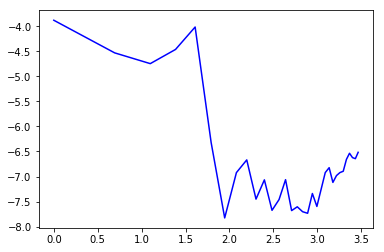

In [14]:
loops_utils.plot_densities([calc_densities_loop_plus_add_mean(loops_x[20], loops_y[20])])

all

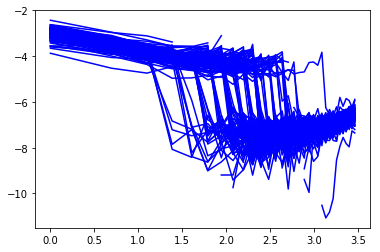

In [15]:
densities = []

for idx, x in enumerate(loops_x):
    y = loops_y[idx]
    d = calc_densities_loop_plus_add_mean(x,y)
    if d is not None: 
        densities.append(calc_densities_loop_plus_add_mean(x,y))

loops_utils.plot_densities(densities)

mean

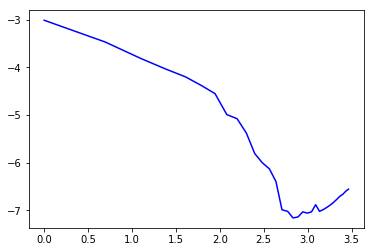

In [16]:
loop_densities_area_mean = np.nanmean(densities, axis=0)
loops_utils.plot_densities([loop_densities_area_mean])

###### sum

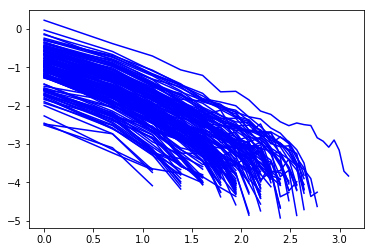

In [17]:
densities = []

for idx, x in enumerate(loops_x):
    loop = arr[x:loops_y[idx], x:loops_y[idx]]
    density = loops_utils.calc_densities_sum(loop)
    densities.append(density)
    
loops_utils.plot_densities(densities)

### Interloops

###### mean

#### Plus area after

In [18]:
def calc_densities_interloops_plus_add_mean(x,y):
    a = arr[x:y, x:y]
    density = loops_utils.calc_densities_mean(a)

    add = max_interloops - (y - x) + 10

    if x-add > 0 and y + add < arr.shape[0]:
        after_a = np.transpose(arr[y:y+add, x-add:x])
        after_density = np.flip(loops_utils.calc_densities_mean(after_a))
        d = np.append(density, after_density)    
        return d
    else:
        return None

In [19]:
begin = 0
max_interloops = 0

for idx in range(0, loops_x.shape[0]-1):
    x = loops_x[idx]
    if begin < x and max_interloops < x-begin:
        max_interloops = x-begin
    begin = loops_y[idx]
    
print(max_interloops)

111


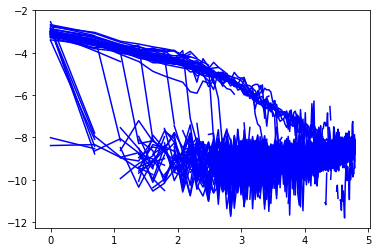

In [20]:
densities = []

begin = 0

for idx in range(0, loops_x.shape[0]-1):
    x = loops_x[idx]
    if begin < x:
        density = calc_densities_interloops_plus_add_mean(begin, x)
        if density is not None:
            densities.append(density)  
    begin = loops_y[idx]
    
loops_utils.plot_densities(densities)

In [21]:
interloops_densities_area_mean = np.nanmean(densities, axis=0)

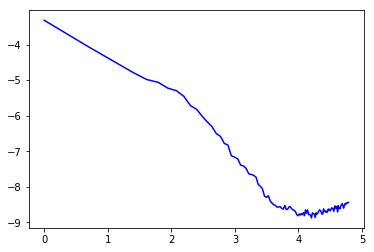

In [22]:
loops_utils.plot_densities([interloops_densities_area_mean])

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


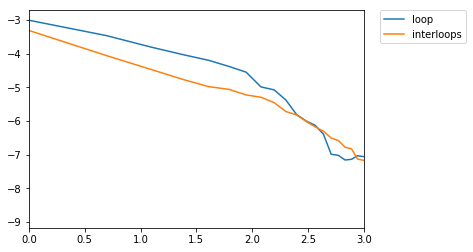

In [23]:
plt.plot(np.log(range(loop_densities_area_mean.shape[0])), np.log(loop_densities_area_mean), label='loop');
plt.plot(np.log(range(interloops_densities_area_mean.shape[0])), np.log(interloops_densities_area_mean), label='interloops');
plt.xlim(0, 3)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


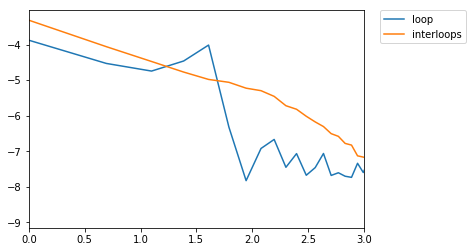

In [24]:
plt.plot(np.log(range(loop_densities_area_mean.shape[0])), np.log(calc_densities_loop_plus_add_mean(loops_x[20], loops_y[20])), label='loop');
plt.plot(np.log(range(interloops_densities_area_mean.shape[0])), np.log(interloops_densities_area_mean), label='interloops');
plt.xlim(0, 3)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

all

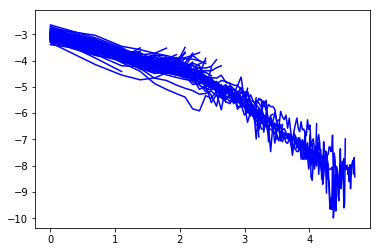

In [25]:
densities = []

begin = 0

for idx, x in enumerate(loops_x):
    if begin < x:
        a = arr[begin:x, begin:x]
        begin = loops_y[idx]
        density = loops_utils.calc_densities_mean(a)
        densities.append(density)
        
loops_utils.plot_densities(densities)

###### sum

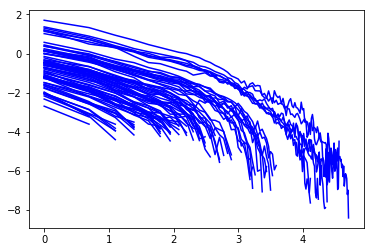

In [26]:
densities = []

begin = 0

for idx, x in enumerate(loops_x):
    if begin < x:
        a = arr[begin:x, begin:x]
        begin = loops_y[idx]
        density = loops_utils.calc_densities_sum(a)
        densities.append(density)
        
loops_utils.plot_densities(densities)

### scaling in one size

###### mean

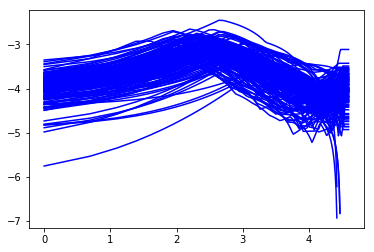

In [27]:
densities = []

width , height = loop_new_size, loop_new_size
resize_image_sum = np.zeros(shape=(width,height))

for idx, x in enumerate(loops_x): 
    original_image = arr[loops_x[idx]:loops_y[idx], loops_x[idx]:loops_y[idx]]
    resized_image = loops_utils.resize_image_arr(original_image, width, height)    
    density = loops_utils.calc_densities_mean(resized_image)
    densities.append(density)
    
loops_utils.plot_densities(densities)

###### average

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


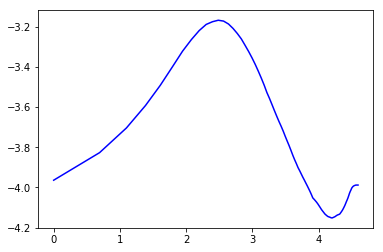

In [28]:
fig = plt.figure()
ax = plt.axes()

sum_density = np.zeros(densities[0].shape[0])

for density in densities:
    sum_density = sum_density + density
    
mean_density = sum_density/len(densities)

np.save('arrs/densities/avg_density_loops_mean_dicty', mean_density)

plt.plot(np.log(range(mean_density.shape[0])), np.log(mean_density), 'b');
plt.show()

###### sum

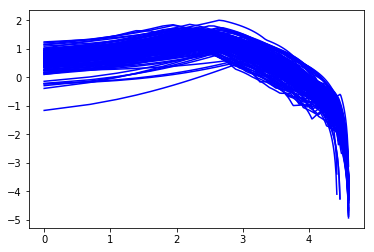

In [29]:
densities = []

width , height = loop_new_size, loop_new_size
resize_image_sum = np.zeros(shape=(width,height))

for idx, x in enumerate(loops_x): 
    original_image = arr[loops_x[idx]:loops_y[idx], loops_x[idx]:loops_y[idx]]
    resized_image = loops_utils.resize_image_arr(original_image, width, height)
    density = loops_utils.calc_densities_sum(resized_image)
    densities.append(density)
    
loops_utils.plot_densities(densities)

###### average

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


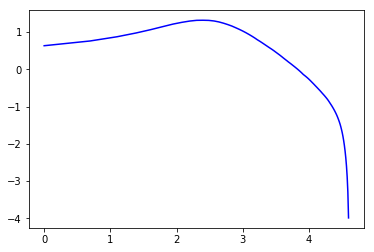

In [30]:
fig = plt.figure()
ax = plt.axes()

sum_density = np.zeros(densities[0].shape[0])

for density in densities:
    sum_density = sum_density + density
    
mean_density = sum_density/len(densities)

np.save('arrs/densities/avg_density_loops_sum_dicty', mean_density)

plt.plot(np.log(range(mean_density.shape[0])), np.log(mean_density), 'b');
plt.show()

### Interloops

###### mean

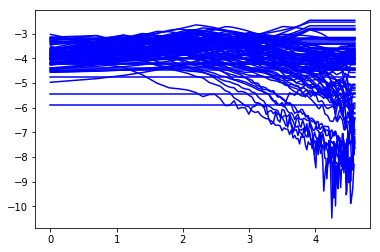

In [31]:
densities = []

begin = 0

width, height = loop_new_size, loop_new_size

for idx, x in enumerate(loops_x):
    if begin < x:       
        original_image = arr[begin:x, begin:x]
        resized_image = loops_utils.resize_image_arr(original_image, width, height)
        begin = loops_y[idx]
        density = loops_utils.calc_densities_mean(resized_image)
        densities.append(density)
        
loops_utils.plot_densities(densities)

###### average

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


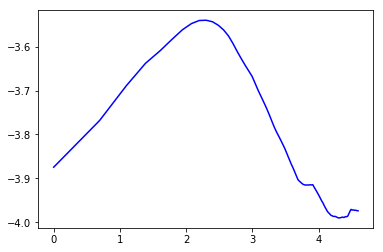

In [32]:
fig = plt.figure()
ax = plt.axes()

sum_density = np.zeros(densities[0].shape[0])

for density in densities:
    sum_density = sum_density + density
    
mean_density = sum_density/len(densities)

np.save('arrs/densities/avg_density_interloops_mean_dicty', mean_density)

plt.plot(np.log(range(mean_density.shape[0])), np.log(mean_density), 'b');
plt.show()

###### sum

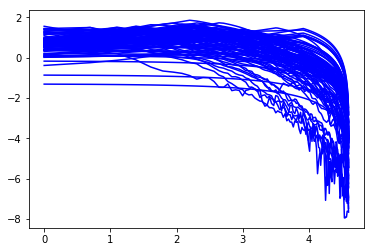

In [33]:
densities = []

begin = 0

width , height = loop_new_size, loop_new_size

for idx, x in enumerate(loops_x):
    if begin < x:
        original_image = arr[begin:x, begin:x]
        resized_image = loops_utils.resize_image_arr(original_image, width, height) 
        begin = loops_y[idx]
        density = loops_utils.calc_densities_sum(resized_image)
        densities.append(density)
        
loops_utils.plot_densities(densities)

###### average

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


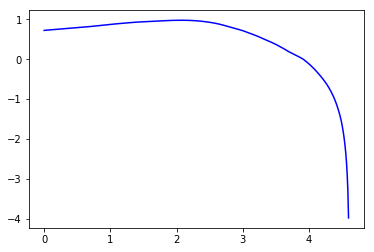

In [34]:
fig = plt.figure()
ax = plt.axes()

sum_density = np.zeros(densities[0].shape[0])

for density in densities:
    sum_density = sum_density + density
    
mean_density = sum_density/len(densities)

np.save('arrs/densities/avg_density_interloops_sum_dicty', mean_density)

plt.plot(np.log(range(mean_density.shape[0])), np.log(mean_density), 'b');
plt.show()